## 1. Read the Data from CSV file

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Student_Marks.csv")

## 2.Display first 5 rows of dataset

In [4]:
df.head(5)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## 3.Display Scale types and datatypes of attributes

In [5]:
#datytpe of the attributes
df.dtypes


number_courses      int64
time_study        float64
Marks             float64
dtype: object

## 4.Perform Scale conversion
convert Relative to ordinal  and nominal consider time_study attribute.

In [6]:
min = df["time_study"].min()
max = df["time_study"].max()
avg = df["time_study"].mean()
avg

4.07714

In [7]:
#relative-ordinal
df = pd.read_csv("Student_Marks.csv")
bins = [0,min, avg, max]  # Ensure the bins are sorted correctly
labels = ["low", "avg", "max"]
df['time_study_ordinal'] = pd.cut(df['time_study'], bins=bins, labels=labels)
df

,number_courses,time_study,Marks,time_study_ordinal
0,3,4.508,19.202,max
1,4,0.096,7.734,low
2,4,3.133,13.811,avg
3,6,7.909,53.018,max
4,8,7.811,55.299,max
...,...,...,...,...
95,6,3.561,19.128,avg
96,3,0.301,5.609,avg
97,4,7.163,41.444,max
98,7,0.309,12.027,avg


In [8]:
#relative-nominal
df = pd.read_csv("Student_Marks.csv")
bins = [0,0.096, 4.077,7.957]  # Ensure the bins are sorted correctly
labels = ["A","B","C"]
df['time_study_nominal'] = pd.cut(df["time_study"], bins=bins,labels=labels)
df

,number_courses,time_study,Marks,time_study_nominal
0,3,4.508,19.202,C
1,4,0.096,7.734,A
2,4,3.133,13.811,B
3,6,7.909,53.018,C
4,8,7.811,55.299,C
...,...,...,...,...
95,6,3.561,19.128,B
96,3,0.301,5.609,B
97,4,7.163,41.444,C
98,7,0.309,12.027,B


## Univariate Analysis
 -Absolute Frequency
 -Relative Frequency
 -Absolute cumulative Frequency
 -Relative cumulative Frequency

In [9]:
#absolute frequency
df = pd.read_csv("Student_Marks.csv")
df["count"]=1
absolute_frequency = df.groupby(['number_courses'])['count'].count()
print(absolute_frequency)

#relative frequency
n=df.shape[0]
relative_frequency = (df.groupby(['number_courses'])['count'].count() / n) * 100
print(relative_frequency)


number_courses
3    22
4    21
5    10
6    16
7    15
8    16
Name: count, dtype: int64
number_courses
3    22.0
4    21.0
5    10.0
6    16.0
7    15.0
8    16.0
Name: count, dtype: float64


In [14]:
#absolute cumulative frequency
# NOTE:reset_index(): Converts the resulting Series into a DataFrame by resetting the index.
# It transforms the grouped-by column ('number_courses'), which was the index of the Series, into a regular column, and assigns a new default integer index to the DataFrame
df = pd.read_csv("Student_Marks.csv")
df['count'] =1
absolute_frequency = df.groupby(['number_courses'])['count'].count().reset_index()
print(absolute_frequency)
cumulative_absolute_frequency = absolute_frequency['count'].cumsum()
print(cumulative_absolute_frequency)


#cumulative relative frequenct
cumulative_relative_frequency = (cumulative_absolute_frequency/n)*100
print(cumulative_relative_frequency)

   number_courses  count
0               3     22
1               4     21
2               5     10
3               6     16
4               7     15
5               8     16
0     22
1     43
2     53
3     69
4     84
5    100
Name: count, dtype: int64
0     22.0
1     43.0
2     53.0
3     69.0
4     84.0
5    100.0
Name: count, dtype: float64


## Find Univariate Statistics
Min
max
median
1st quartile
2nd quartile
3rd quartile


In [15]:
df = pd.read_csv("Student_Marks.csv")
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


## Display the boxplot to analyse the data distribution

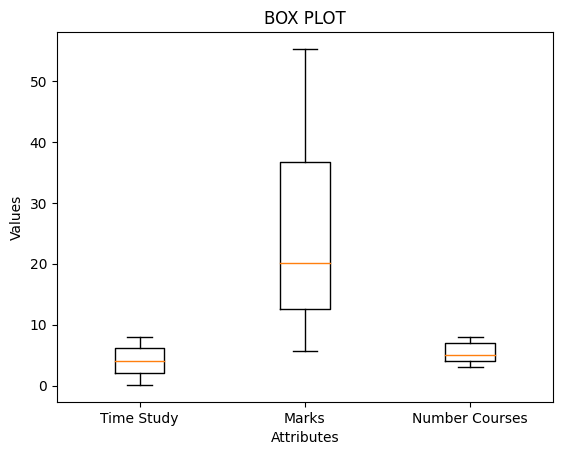

In [16]:
import matplotlib.pyplot as plt
df = pd.read_csv("Student_Marks.csv")
boxPlot = plt.boxplot([df["time_study"],df["Marks"],df["number_courses"]], labels=["Time Study", "Marks", "Number Courses"])
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.title("BOX PLOT")
plt.show()



## Find Dispersion Statistics
-Amplitude
-Mean Deviation
-Standard Deviation
-variance
-z-score

In [17]:
#Amplitude
Amplitude = df["Marks"].max()-df["Marks"].min()
print("AMPLITUDE", Amplitude)


#Mean Deviation

mean_deviation = (df['Marks'] - df["Marks"].mean()).abs().mean()
print("MD", mean_deviation)

#standard deviation
std_div = df["Marks"].std()
print("SD", std_div)

#variance
print("VARIANCE", np.sqrt(std_div))

#z-score (for every value)

df["Z-Socre(Marks)"] = (df["Marks"]-df["Marks"].mean())/std_div
df

AMPLITUDE 49.69
MD 11.9556556
SD 14.326198570757976
VARIANCE 3.7849965086850443


,number_courses,time_study,Marks,Z-Socre(Marks)
0,3,4.508,19.202,-0.364067
1,4,0.096,7.734,-1.164558
2,4,3.133,13.811,-0.740370
3,6,7.909,53.018,1.996364
4,8,7.811,55.299,2.155583
...,...,...,...,...
95,6,3.561,19.128,-0.369232
96,3,0.301,5.609,-1.312888
97,4,7.163,41.444,1.188474
98,7,0.309,12.027,-0.864897


## Find the Co-relation between each and every pair of attributes by plotting scatter plot

PearsonCorr x & y 0.9422538903640542
Kendall x & y 0.8343434343434345
SpearmanRank x & y 0.9595559555955594


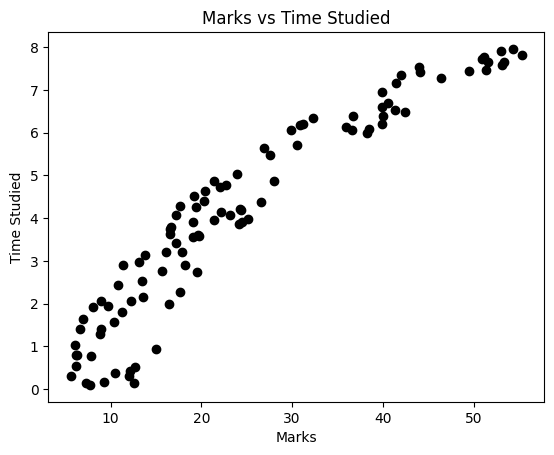

In [18]:
import matplotlib.pyplot as plt
x = df["Marks"]
y = df["time_study"]
pearson_corr = x.corr(y, method='pearson')
print("PearsonCorr x & y", pearson_corr)
kendall_corr = x.corr(y, method='kendall')
print("Kendall x & y", kendall_corr)
spearman_rank_corr = x.corr(y,method="spearman")
print("SpearmanRank x & y", spearman_rank_corr)

#corelation matrix for co-relation between all the attributes

df.corr(method="kendall")
df.corr(method="pearson")
df.corr(method="spearman")

plt.scatter(x,y,color='black')
plt.title("Marks vs Time Studied")
plt.xlabel("Marks")
plt.ylabel("Time Studied")
plt.show()


## Analyze three attributes using scatter plot
-2 qauntitative 1 qualitative
3 quantitative

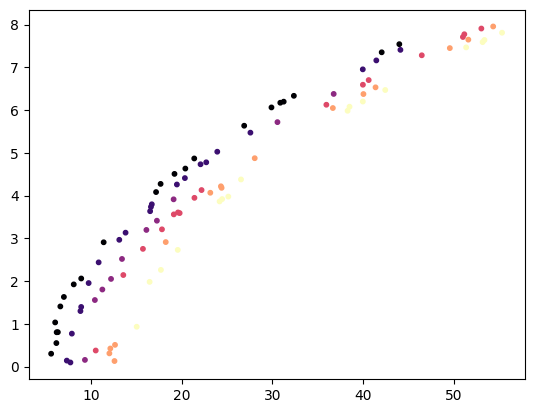

In [19]:
import matplotlib.pyplot as plt
df = pd.read_csv("Student_Marks.csv")
#def scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs

#s: An array or scalar specifying the size of the points in the scatter plot. It can be a single size for all points or an array of sizes, each corresponding to a point.

#c: An array or scalar specifying the color of the points. It can be a single color for all points or an array of colors, each corresponding to a point.

#marker: A string specifying the shape of the markers. Matplotlib supports various marker styles such as 'o' (circle), '^' (triangle), 's' (square), etc.

#cmap: A colormap used to map the numerical values in c to colors. It only applies if c is an array of numerical values.
# COMMON COLOR-MAPS'viridis' 'plasma' 'inferno' 'magma' 'cividis'

#norm (normalization)
# norm: A normalization instance used to scale data values in c to the range [0, 1]. Often used in combination with c and cmap.
plt.scatter(df["Marks"],df["time_study"], c=df["number_courses"], cmap='magma', s=10)

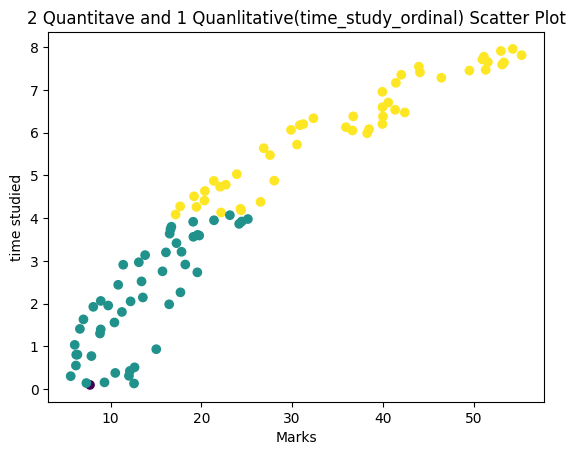

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("Student_Marks.csv")
bins = [0,0.096, 4.077, 7.957]  # Ensure the bins are sorted correctly
labels = ["low","avg","max"]
df['time_study_ordinal'] = pd.cut(df['time_study'], bins=bins, labels=labels)
category_mapping = {'low': 0, 'avg': 1, 'max': 2}
x = df["time_study_ordinal"].map(category_mapping)
plt.scatter(df["Marks"],df["time_study"], c=x)
plt.title("2 Quantitave and 1 Quanlitative(time_study_ordinal) Scatter Plot")
plt.xlabel("Marks")
plt.ylabel("time studied")

plt.show()

Plot 3d-plots for 3 attributes

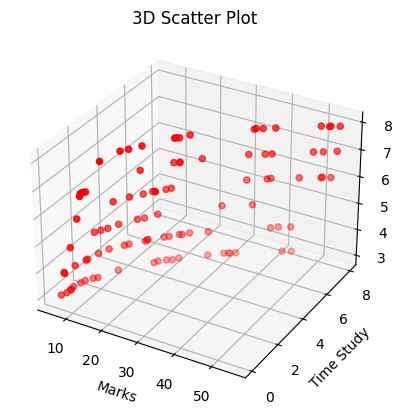

In [ ]:
# fig = plt.figure(): This creates a new figure object, which is the container for all plot elements.
# ax = fig.add_subplot(111, projection='3d'): Here, we add a subplot to the figure fig. The 111 means a single plot (1 row, 1 column, plot number 1). projection='3d' specifies that this subplot should be a 3D plot.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Marks"], df["time_study"], df["number_courses"], c='r')

ax.set_xlabel('Marks')
ax.set_ylabel('Time Study')
ax.set_zlabel('Number Courses')
ax.set_title('3D Scatter Plot')
plt.show()